In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
sns.set(style='whitegrid')

In [26]:
file_path = r"F:\Projects\Churn\Data & Resources\Data\Prediction_Data.xlsx"
sheet_name = 'vw_ChurnData'
data = pd.read_excel(file_path, sheet_name=sheet_name)
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11098-MAD,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,...,Bank Withdrawal,95.099998,6683.399902,0.00,0,631.719971,7315.120117,Stayed,Others,Others
1,11114-PUN,Male,51,No,Punjab,5,9,Deal 5,Yes,No,...,Bank Withdrawal,49.150002,169.050003,0.00,10,122.370003,301.420013,Churned,Competitor,Competitor had better devices
2,11167-WES,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,...,Bank Withdrawal,116.050003,8297.500000,42.57,110,1872.979980,10237.910156,Stayed,Others,Others
3,11179-MAH,Male,35,No,Maharashtra,10,12,NaN,Yes,No,...,Credit Card,84.400002,5969.299805,0.00,0,219.389999,6188.689941,Stayed,Others,Others
4,11180-TAM,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,...,Credit Card,72.599998,4084.350098,0.00,140,332.079987,4556.430176,Stayed,Others,Others


In [22]:
print(data.columns.tolist())




['Customer_ID', 'Gender', 'Age', 'Married', 'State', 'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup', 'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing', 'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason']


In [27]:
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)
columns_to_encode = ['Gender','Married','State','Value_Deal','Phone_Service','Multiple_Lines','Internet_Service','Internet_Type','Online_Security','Online_Backup','Device_Protection_Plan','Premium_Support','Streaming_TV','Streaming_Movies','Streaming_Music','Unlimited_Data','Contract','Paperless_Billing','Payment_Method']
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])
data['Customer_Status'] = data['Customer_Status'].map({'Stayed':0,'Churned':1})
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[783  64]
 [126 229]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       847
           1       0.78      0.65      0.71       355

    accuracy                           0.84      1202
   macro avg       0.82      0.78      0.80      1202
weighted avg       0.84      0.84      0.84      1202



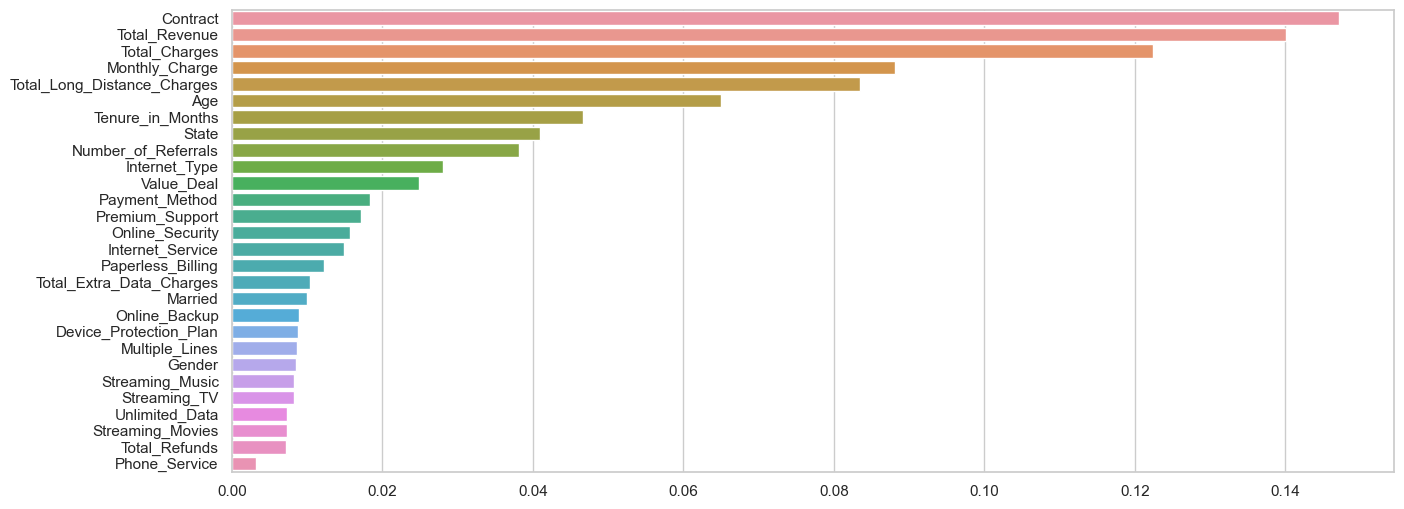

In [30]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(15,6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.show()

In [31]:
new_data = pd.read_excel(r"F:\Projects\Churn\Data & Resources\Data\Prediction_Data.xlsx", sheet_name='vw_JoinData')
original_data = new_data.copy()
new_data = new_data.drop(['Customer_ID','Customer_Status','Churn_Category','Churn_Reason'], axis=1)
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])
pred = rf_model.predict(new_data)
original_data['Customer_Status_Predicted'] = pred
churned = original_data[original_data['Customer_Status_Predicted']==1]
churned.to_csv(r"F:\Projects\Churn\Data & Resources\Data\Predictions.csv", index=False)
churned.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason,Customer_Status_Predicted
0,11751-TAM,Female,18,No,Tamil Nadu,5,7,Deal 5,No,No,...,24.299999,38.450001,0.0,0,0.000000,38.450001,Joined,Others,Others,1
1,12056-WES,Male,27,No,West Bengal,2,20,NaN,Yes,No,...,90.400002,268.450012,0.0,0,94.440002,362.890015,Joined,Others,Others,1
2,12136-RAJ,Female,25,Yes,Rajasthan,2,35,NaN,Yes,No,...,19.900000,19.900000,0.0,0,11.830000,31.730000,Joined,Others,Others,1
3,12257-ASS,Female,39,No,Assam,9,1,NaN,Yes,No,...,19.549999,19.549999,0.0,0,10.200000,29.750000,Joined,Others,Others,1
4,12340-DEL,Female,51,Yes,Delhi,0,10,NaN,Yes,No,...,62.799999,62.799999,0.0,0,42.189999,104.989998,Joined,Others,Others,1
